In [4]:
import numpy as np
import pandas as pd

import os 

In [2]:
os.getcwd()


'C:\\Users\\VIVEK\\DSP05 online notes'

In [3]:
os.chdir(r"D:\DATA Sets\Airline Delay Data\data-society-airlines-delay\data-society-airlines-delay\airlinedelaycauses")

In [44]:
data = pd.read_csv("DelayedFlights.csv")
data = data.drop("Unnamed: 0",1)
data = data[data['Month'].isin([10,11,12])]
#Yaha pe ye jaha monthh 10 11 12 he usko data me leke aaya he 
#the .isin funciton find 10,11,12 in data and collect only those valuse that is 10,11,12

In [57]:
data.isin?

In [45]:
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1524285,2008,10,3,5,1742.0,1730,1901.0,1905,WN,2155,...,8.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1524286,2008,10,3,5,1906.0,1900,2211.0,2220,WN,45,...,4.0,5.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1524287,2008,10,3,5,1602.0,1550,1655.0,1650,WN,33,...,2.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1524288,2008,10,3,5,2148.0,2120,2240.0,2215,WN,55,...,1.0,9.0,0,N,0,0.0,0.0,0.0,0.0,25.0
1524289,2008,10,3,5,2149.0,2130,2252.0,2235,WN,1079,...,5.0,7.0,0,N,0,7.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [46]:
#Let's check number of rows and number of columns
nRow,nCol = data.shape

In [47]:
print(f"The number of rows is {nRow} and column is {nCol}")

The number of rows is 412473 and column is 29


In [48]:
#Let's have a quick look on data

In [49]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1524285,2008,10,3,5,1742.0,1730,1901.0,1905,WN,2155,...,8.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1524286,2008,10,3,5,1906.0,1900,2211.0,2220,WN,45,...,4.0,5.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1524287,2008,10,3,5,1602.0,1550,1655.0,1650,WN,33,...,2.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1524288,2008,10,3,5,2148.0,2120,2240.0,2215,WN,55,...,1.0,9.0,0,N,0,0.0,0.0,0.0,0.0,25.0
1524289,2008,10,3,5,2149.0,2130,2252.0,2235,WN,1079,...,5.0,7.0,0,N,0,7.0,0.0,0.0,0.0,10.0


### Day of the Week Bar Chart
Here we group both dataframes by the DayOfWeek, and calculate the percentage of cancelled flights for each day of the week and display them in a bar chart

In [50]:
import matplotlib.pyplot as plt

In [51]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [52]:
data['TaxiOut'].fillna(0, inplace=True)
cancelled = data[data['Cancelled']==1]

In [53]:
cancelled.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1542406,2008,10,27,1,1622.0,1420,NaN,1520,WN,27,...,NaN,19.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1546593,2008,10,25,6,1323.0,1255,NaN,1442,XE,2347,...,NaN,0.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1547161,2008,10,22,3,1825.0,1815,NaN,1927,XE,2819,...,NaN,0.0,1,C,0,NaN,NaN,NaN,NaN,NaN
1547178,2008,10,22,3,1733.0,1715,NaN,1818,XE,2890,...,NaN,0.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1548271,2008,10,15,3,1943.0,1745,NaN,1857,XE,2117,...,NaN,0.0,1,B,0,NaN,NaN,NaN,NaN,NaN


In [54]:
plt.subplot?

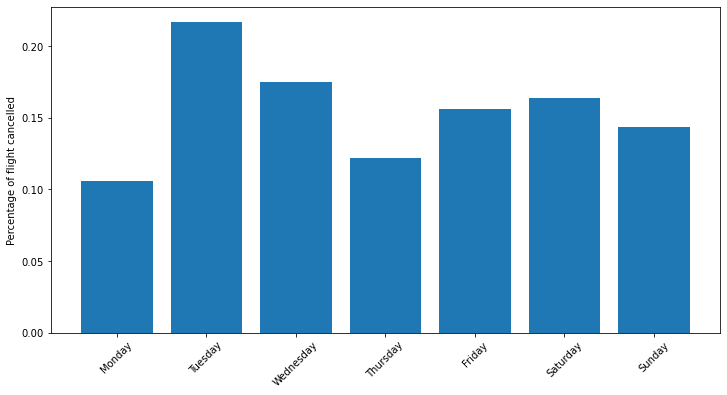

In [55]:
font = {'size':16}
days_cancelled=cancelled['Cancelled'].groupby(data['DayOfWeek']).count()
days_total = data['Cancelled'].groupby(data['DayOfWeek']).count()
days_frac = np.divide(days_cancelled,days_total)
x = days_frac.index.values
week=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of flight cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)
plt.show()

This shows monday has les fligh delay as compared to other days
